In [1]:
# Pacotes de preparação dos dados
import numpy as np
import pandas as pd

# Pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de modelagem
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
df_iris = pd.read_csv('pagamento.csv')
df_iris.head()

,Pagou_Divida,Renda_Presumida,Idade
0,0,1583.33,19
1,0,1666.67,35
2,0,3583.33,26
3,0,4750.00,27
4,0,6333.33,19


In [5]:
df_iris.isnull().sum()

Pagou_Divida       0
Renda_Presumida    0
Idade              0
dtype: int64

In [7]:
df_iris.duplicated().sum()

33

In [9]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pagou_Divida     400 non-null    int64  
 1   Renda_Presumida  400 non-null    float64
 2   Idade            400 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 9.5 KB


C:\Users\FIC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\FIC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


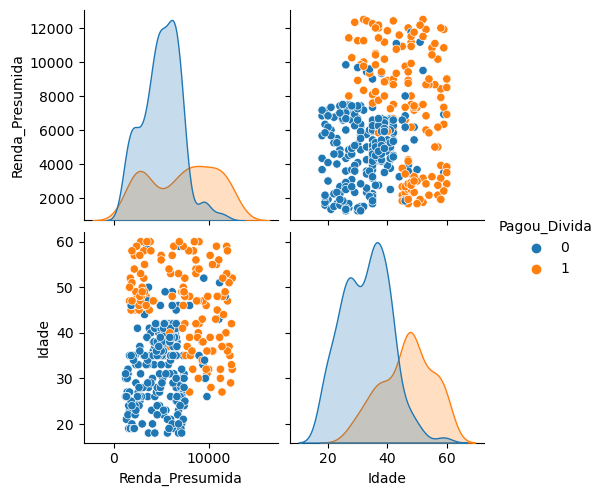

In [17]:
sns.pairplot(df_iris, hue='Pagou_Divida')
#sns.pairplot(df_iris)

In [19]:
# Seleção das variáveis
df_modelo = df_iris[['Renda_Presumida',
                     'Idade']].copy()

# Padronização da Escala
x_scaler = StandardScaler()
x_scaler.fit(df_modelo)

df_modelo_scaled = pd.DataFrame(x_scaler.transform(df_modelo),
                                index=df_modelo.index,
                                columns=df_modelo.columns)

In [21]:
df_modelo.describe()

,Renda_Presumida,Idade
count,400.000000,400.000000
mean,5811.875275,37.655000
std,2841.413521,10.482877
min,1250.000000,18.000000
25%,3583.330000,29.750000
50%,5833.330000,37.000000
75%,7333.330000,46.000000
max,12500.000000,60.000000


In [23]:
df_modelo_scaled.describe()

,Renda_Presumida,Idade
count,4.000000e+02,4.000000e+02
mean,-4.618528e-16,-7.105427e-17
std,1.001252e+00,1.001252e+00
min,-1.607506e+00,-1.877311e+00
25%,-7.852909e-01,-7.550313e-01
50%,7.560179e-03,-6.256110e-02
75%,5.361276e-01,7.970571e-01
max,2.356750e+00,2.134241e+00


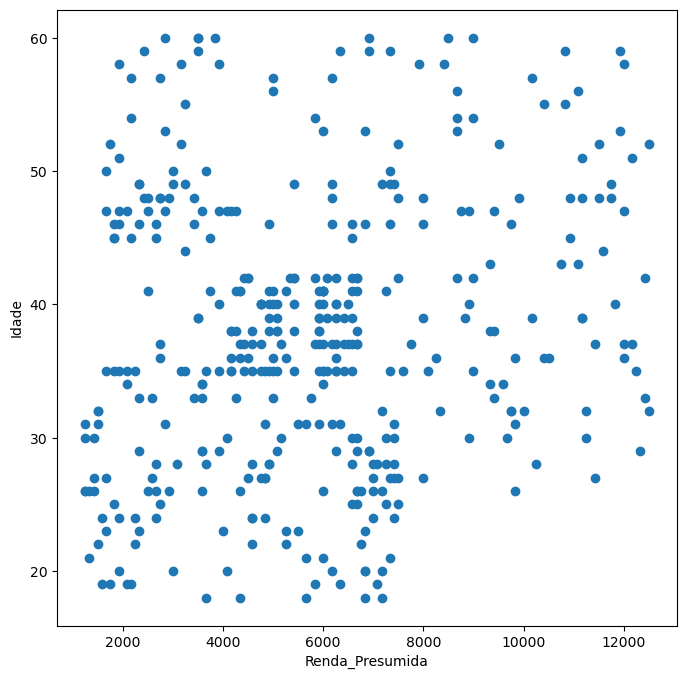

In [25]:
# Plotando comprimento_petala por largura_petala
fig = plt.figure(figsize=(8,8))
plt.scatter(df_modelo['Renda_Presumida'],
            df_modelo['Idade']);
plt.xlabel('Renda_Presumida');
plt.ylabel('Idade');

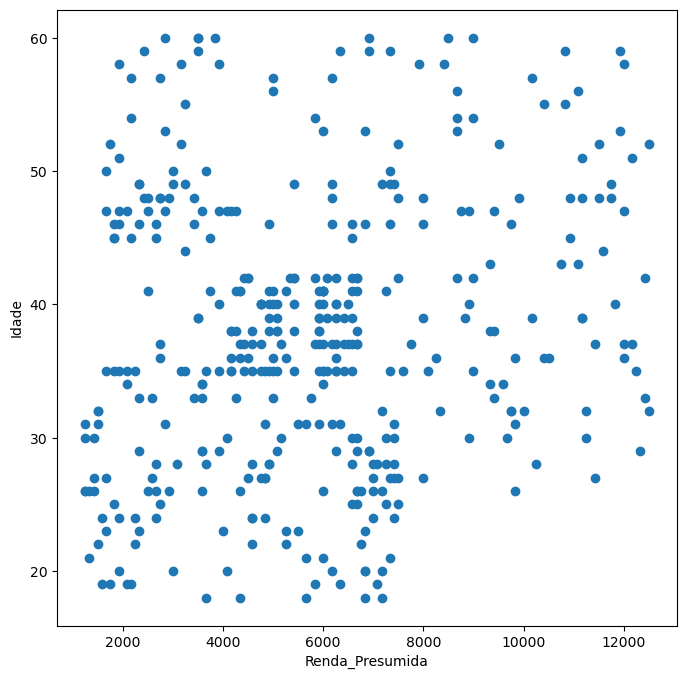

In [29]:
# Plotando comprimento_petala por largura_petala
# com escala padronizada
fig = plt.figure(figsize=(8,8))
plt.scatter(df_modelo['Renda_Presumida'],
            df_modelo['Idade']);
plt.xlabel('Renda_Presumida');
plt.ylabel('Idade');

In [31]:
modelo_km = KMeans(n_clusters=2, 
                   random_state=42)
modelo_km.fit(df_modelo_scaled)

C:\Users\FIC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\FIC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [33]:
cluster_predito = modelo_km.predict(df_modelo_scaled)
cluster_predito

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [35]:
modelo_km.cluster_centers_

array([[ 1.24496387,  0.66793746],
       [-0.46046609, -0.24704536]])

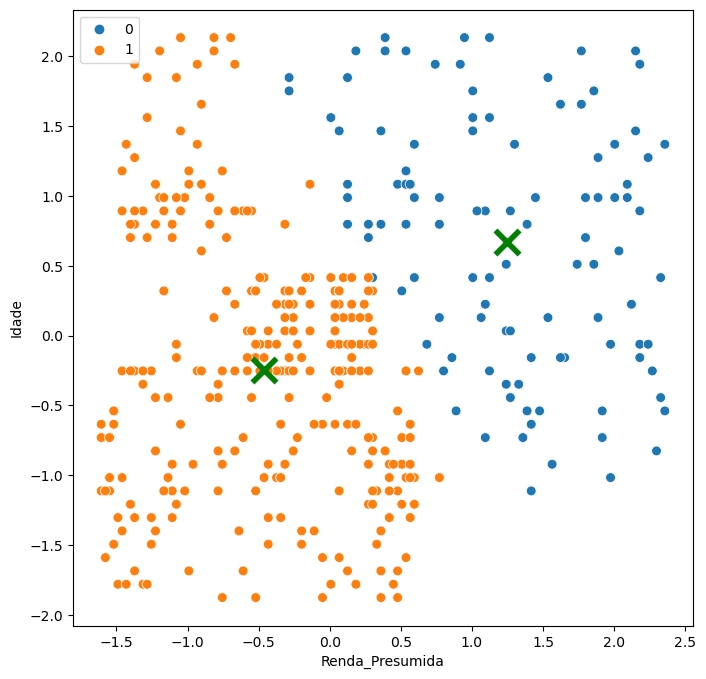

In [37]:
fig = plt.figure(figsize=(8,8))

# Plotando comprimento_petala por largura_petala
sns.scatterplot(x=df_modelo_scaled['Renda_Presumida'],
                y=df_modelo_scaled['Idade'],
                hue=cluster_predito, s=50)

# Marcando os centróides
sns.scatterplot(x=modelo_km.cluster_centers_[:,0],
                y=modelo_km.cluster_centers_[:,1], 
                marker='x', s=300, 
                linewidth=4, color='green', zorder=10);

In [39]:
modelo_km.inertia_

504.69019962672

C:\Users\FIC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\FIC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\FIC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\FIC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment varia

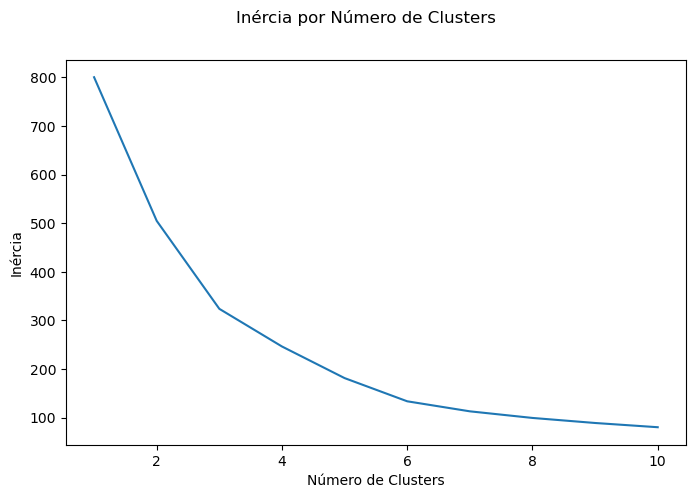

In [41]:
# Utilizando o Método do Cotovelo (Elbow-curve)
range_n_clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
inercia = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_modelo_scaled)
    inercia.append(kmeans.inertia_)

fig = plt.figure(figsize=(8,5))
graf = sns.lineplot(x=range_n_clusters,
             y=inercia)
graf.figure.suptitle('Inércia por Número de Clusters');
graf.set_xlabel('Número de Clusters');
graf.set_ylabel('Inércia');

In [43]:
modelo_km3 = KMeans(n_clusters=3, 
                    random_state=42)

modelo_km3.fit(df_modelo_scaled)

C:\Users\FIC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\FIC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [71]:
df_cluster_flor = pd.concat([df_modelo[['cluster']],
                             df_iris[['Pagou_Divida']]], 
                            axis=1)
df_cluster_flor.head()

,cluster,Pagou_Divida
0,2,0
1,2,0
2,2,0
3,2,0
4,2,0


In [73]:
df_cluster_flor.pivot_table(values='Pagou_Divida', 
                            index='cluster')

,Pagou_Divida
cluster,
0,0.496403
1,0.853659
2,0.022346


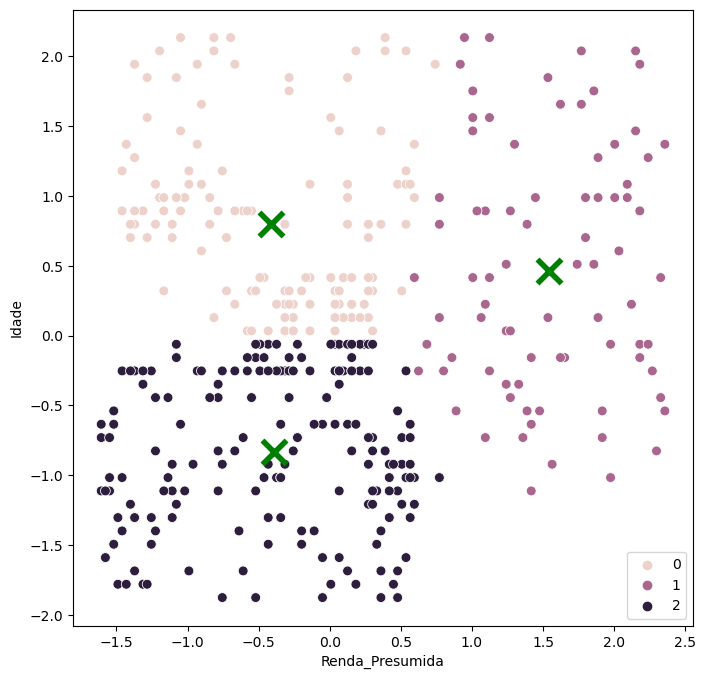

In [45]:
cluster_predito = modelo_km3.predict(df_modelo_scaled)

fig = plt.figure(figsize=(8,8))
# Plotando comprimento_sepala por comprimento_petala
sns.scatterplot(x=df_modelo_scaled['Renda_Presumida'],
                y=df_modelo_scaled['Idade'],
                hue=cluster_predito,
                s=50)

# Marcando os centróides
sns.scatterplot(x=modelo_km3.cluster_centers_[:,0],
                y=modelo_km3.cluster_centers_[:,1], 
                marker='x', s=300, 
                linewidth=4, color='green', zorder=10);

In [53]:
df_modelo['cluster'] = modelo_km3.predict(df_modelo_scaled)

In [55]:
df_modelo.groupby('cluster').describe().T

cluster                          0             1            2
Renda_Presumida count   139.000000     82.000000   179.000000
                mean   4648.681511  10194.106220  4707.635028
                std    1708.112614   1424.004192  1945.082871
                min    1666.670000   7500.000000  1250.000000
                25%    3208.335000   9000.000000  2958.335000
                50%    4916.670000  10083.335000  4833.330000
                75%    6083.330000  11416.670000  6458.335000
                max    7916.670000  12500.000000  8000.000000
Idade           count   139.000000     82.000000   179.000000
                mean     46.021583     42.487805    28.944134
                std       6.552428      9.248615     5.691232
                min      38.000000     26.000000    18.000000
                25%      41.000000     35.000000    25.000000
                50%      46.000000     42.000000    29.000000
                75%      49.000000     48.750000    35.000000
                max      60.000000     60.000000    37.000000

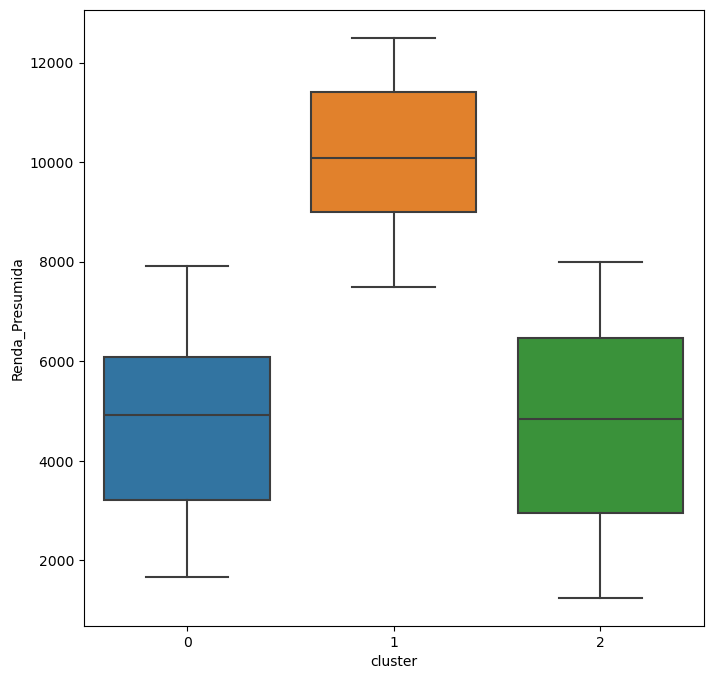

In [59]:
# Análise dos clusters em relação ao Comprimento da Pétala
fig = plt.figure(figsize=(8,8))
sns.boxplot(x='cluster',
            y='Renda_Presumida', 
            data=df_modelo);

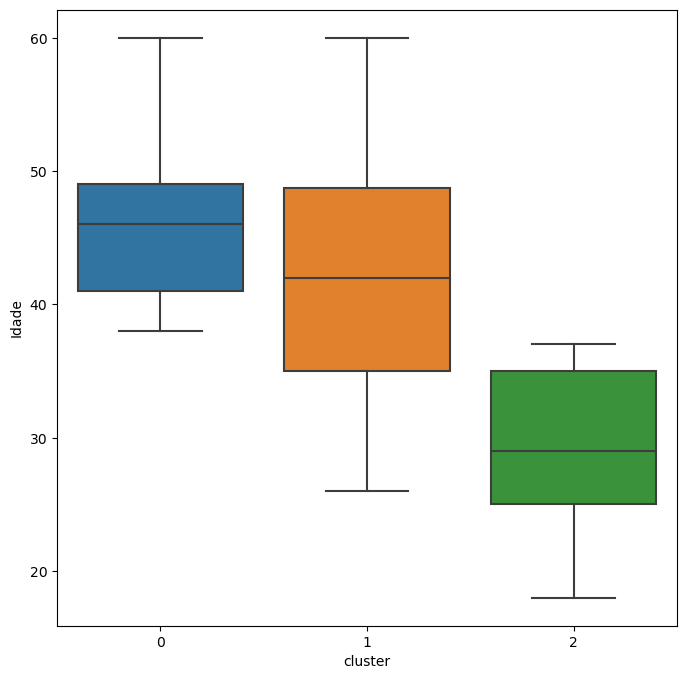

In [61]:
# Análise dos clusters em relação ao Comprimento da Sépala
fig = plt.figure(figsize=(8,8))
sns.boxplot(x='cluster',
            y='Idade', 
            data=df_modelo);

In [63]:
df_iris.head()

,Pagou_Divida,Renda_Presumida,Idade
0,0,1583.33,19
1,0,1666.67,35
2,0,3583.33,26
3,0,4750.00,27
4,0,6333.33,19


In [67]:
df_cluster_flor = pd.concat([df_modelo[['cluster']],
                             df_iris[['Pagou_Divida']]], 
                            axis=1)
df_cluster_flor.head()

,cluster,Pagou_Divida
0,2,0
1,2,0
2,2,0
3,2,0
4,2,0


In [69]:
df_cluster_flor.pivot_table(values='Pagou_Divida', 
                            index='cluster')

,Pagou_Divida
cluster,
0,0.496403
1,0.853659
2,0.022346
